# Actividad 4 (Extracción de características)

####Angel Rubén Vázquez Rivera
######A01735407
_______________________________________

### 1. Importar librerias

In [ ]:
#Instalamos la librería para análisis de variables categóricas
%pip install funpymodeling

In [2]:
#Importamos las librerias pandas, numpy, y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

###2. Cargar el CSV a usar


In [3]:
data = pd.read_excel("microretailer_mit_lift_lab.xlsx")

# columnas elegidas
columnasElegidas = [1, 3, 9, 10, 11, 12, 13, 14, 16, 21, 22, 25, 26, 31, 34, 47, 48, 54, 55, 83]

# Extraccion de las columnas elegidas
dataOk = data.iloc[:, columnasElegidas]
dataOk

,_title,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,20_reviews_finances_monthly,49_inventory_records,145_number_direct_competitors,186_internet_connection,214_customer_relationship_tools,33_credit_to_customers,227_agreement_ecommerce_platforms,60_services,277_payment_method_suppliers
0,"November 12, 2022",Salomon Abdala Perez,Tailor,yes,no,no,2,0.0,4,2.0,2.0,yes,Software especializado + computadora,3.0,yes,Redes sociales,no,no,NaN,NaN
1,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,0,4.0,8,1.0,1.0,yes,No lo hago,4.0,yes,Aplicación móvil,no,no,NaN,Transferencia interbancaria
2,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,0,0.0,24,2.0,2.0,yes,En Excel,0.0,yes,Redes sociales,yes,no,NaN,NaN
3,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,0,0.0,2,1.0,1.0,yes,Software especializado + computadora,4.0,yes,Teléfono,no,no,NaN,NaN
4,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,0,0.0,16,0.0,0.0,yes,En papel,0.0,yes,NaN,yes,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),yes,no,no,1,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),no,no,no,1,5.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,"November 3, 2022",Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,3,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,"November 3, 2022",Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Columnas cuantitativas y cualitativas

In [4]:
# Separar columnas cuantitativas y cualitativas
dataCualitativo  = dataOk.iloc[: , [0,1,2,3,4,5,11,12,14,15,16,17,18,19]]
dataCuantitativo = dataOk.iloc[: , [6,7,8,9,10,13]]

print(f'Columnas cualitativas: {dataCualitativo.columns}')
print(f'\n\nColumnas cuantitativas: {dataCuantitativo.columns}')

Columnas cualitativas: Index(['_title', '_updated_by', '232_type_of_store',
       '108_does_the_micro_retailer_has_a_barred_window_',
       '99_does_the_micro_retailer_exhibits_products_outside_',
       '102_does_the_micro_retailer_sells_fresh_products_',
       '20_reviews_finances_monthly', '49_inventory_records',
       '186_internet_connection', '214_customer_relationship_tools',
       '33_credit_to_customers', '227_agreement_ecommerce_platforms',
       '60_services', '277_payment_method_suppliers'],
      dtype='object')


Columnas cuantitativas: Index(['97_number_of_customers_in_store', '268_number_fridges',
       '104_how_many_shelves_does_the_micro_retailer_have',
       '2_current_permanent_employees',
       '4_number_permanent_employees_last_year',
       '145_number_direct_competitors'],
      dtype='object')


###4. Detectar datos nulos

In [5]:
valoresNulos = dataCuantitativo.isnull().sum()
valoresNulos

97_number_of_customers_in_store                       0
268_number_fridges                                    3
104_how_many_shelves_does_the_micro_retailer_have     0
2_current_permanent_employees                        60
4_number_permanent_employees_last_year               76
145_number_direct_competitors                        68
dtype: int64

###5. Tratar los valores nulos

En este caso al visualizar las columnas cuantitativas con valores nulos, pude observar que la mejor manera de rellenar esos vacios en mis datos era con un simple 0, ya que al no contar con registros existentes es posible que simplemente el establecimiento no cuente con lo indicado en la columna.

In [6]:
#Agilizar el proceso de sustitucion de valores nulos
data2 = dataCuantitativo.copy()
data2 = data2.fillna(0)

####Comprobar la ausencia de valores nulos

In [7]:
valoresNulos = data2.isnull().sum()
valoresNulos

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
145_number_direct_competitors                        0
dtype: int64

###5. Mostrar la distibución de datos y valores atípicos

<Figure size 1500x800 with 0 Axes>

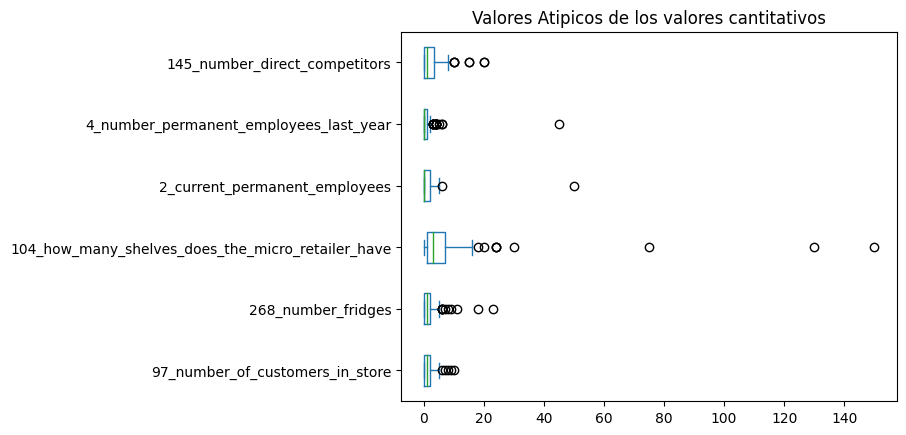

In [8]:
fig = plt.figure(figsize = (15, 8))
data2.plot(kind='box', vert=False)
plt.title('Valores Atipicos de los valores cantitativos')
plt.show()

###6. Metodo Cuantiles

Asi es posible encontrar los valores extremos de cada variable o columna de tipo cuantitativo

In [9]:
# Encontramos los valores extremos
y = data2

percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3

iqr = percentile75 - percentile25

limiteSuperiorIQR = percentile75 + 1.5 * iqr
limiteInferiorIQR = percentile25 - 1.5 * iqr


print(f"Limite superior permitido :")
for col, val in limiteSuperiorIQR.items():
    print(f"{col}: {round(val, 2)}")

print(f"\n\nLimite inferior permitido :")
for col, val in limiteInferiorIQR.items():
    print(f"{col}: {round(val, 2)}")

Limite superior permitido :
97_number_of_customers_in_store: 5.0
268_number_fridges: 5.0
104_how_many_shelves_does_the_micro_retailer_have: 16.0
2_current_permanent_employees: 5.0
4_number_permanent_employees_last_year: 2.5
145_number_direct_competitors: 8.75


Limite inferior permitido :
97_number_of_customers_in_store: -3.0
268_number_fridges: -3.0
104_how_many_shelves_does_the_micro_retailer_have: -8.0
2_current_permanent_employees: -3.0
4_number_permanent_employees_last_year: -1.5
145_number_direct_competitors: -5.25


###7. Encontrar los Outliers

In [10]:
# Encontramos Outliers
outliers = data2[(y>limiteSuperiorIQR) | (y<limiteInferiorIQR)]
print(f"\nOutliers:\n")
for col, val in outliers.items():
    print(f"{col}: {round(val, 2)}")


Outliers:

97_number_of_customers_in_store: 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
Name: 97_number_of_customers_in_store, Length: 171, dtype: float64
268_number_fridges: 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
Name: 268_number_fridges, Length: 171, dtype: float64
104_how_many_shelves_does_the_micro_retailer_have: 0       NaN
1       NaN
2      24.0
3       NaN
4       NaN
       ... 
166     NaN
167     NaN
168     NaN
169     NaN
170     NaN
Name: 104_how_many_shelves_does_the_micro_retailer_have, Length: 171, dtype: float64
2_current_permanent_employees: 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN
168   NaN
169   NaN
170   NaN
Name: 2_current_permanent_employees, Length: 171, dtype: float64
4_number_permanent_employees_last_year: 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
166   NaN
167   NaN


####7.1 Convertir los Outliers en valores nulos para su posterior sustitucion

In [27]:
data3_iqr = data2[(y<=limiteSuperiorIQR) & (y>=limiteInferiorIQR)]
data3_iqr

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors
0,2.0,0.0,4.0,2.0,2.0,3.0
1,0.0,4.0,8.0,1.0,1.0,4.0
2,0.0,0.0,NaN,2.0,2.0,0.0
3,0.0,0.0,2.0,1.0,1.0,4.0
4,0.0,0.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0
167,1.0,5.0,5.0,0.0,0.0,0.0
168,3.0,1.0,1.0,0.0,0.0,0.0
169,0.0,1.0,1.0,0.0,0.0,0.0


####7.2 Comprobamos que existan valores nulos de nueva cuenta

In [28]:
# Corroboramos valores nulos
valores_nulos = data3_iqr.isnull().sum()
print(valores_nulos)

97_number_of_customers_in_store                       5
268_number_fridges                                   10
104_how_many_shelves_does_the_micro_retailer_have     9
2_current_permanent_employees                         2
4_number_permanent_employees_last_year               18
145_number_direct_competitors                         7
dtype: int64


####7.3 Sustituimos los nulos por el mean de cada columna

In [37]:
# Reemplazamos los outliers con el mean de cada col
data4_iqr = data3_iqr.copy()
data4_iqr = data_clean.fillna(round(data3_iqr.mean(), 1))
display(data4_iqr)

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors
0,2.0,0.0,4.00,2.0,2.0,3.0
1,0.0,4.0,8.00,1.0,1.0,4.0
2,0.0,0.0,4.02,2.0,2.0,0.0
3,0.0,0.0,2.00,1.0,1.0,4.0
4,0.0,0.0,16.00,0.0,0.0,0.0
...,...,...,...,...,...,...
166,1.0,0.0,5.00,0.0,0.0,0.0
167,1.0,5.0,5.00,0.0,0.0,0.0
168,3.0,1.0,1.00,0.0,0.0,0.0
169,0.0,1.0,1.00,0.0,0.0,0.0


####7.4 Comprobamos que efectivamente ya no existen nulos

In [38]:
# Corroboramos valores nulos
valores_nulos = data4_iqr.isnull().sum()
print(valores_nulos)

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
145_number_direct_competitors                        0
dtype: int64


####7.5 Graficos los datos atipicos de nueva cuenta

<Figure size 1900x1200 with 0 Axes>

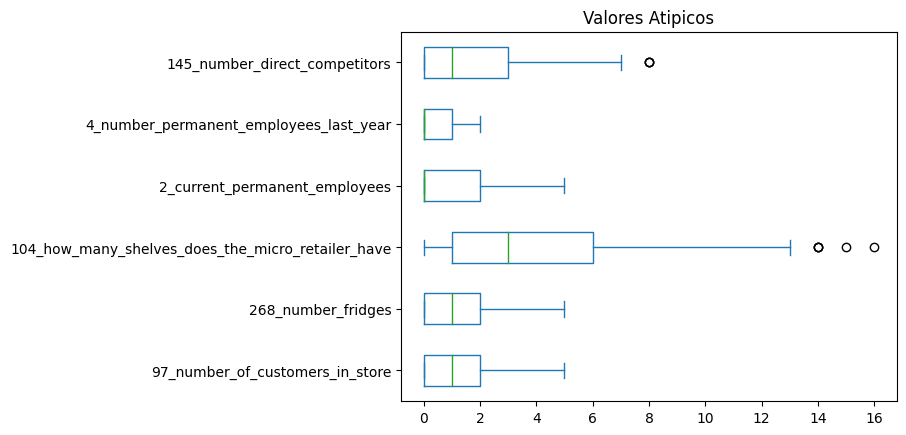

In [34]:
# Graficamos la grafica de boxplot, encontramos nuevos outliers, pero son distintos a los originales
fig = plt.figure(figsize = (19, 12))
data4_iqr.plot(kind='box', vert=False)
plt.title('Valores Atipicos')
plt.show()

###8. Unimos las columnas cuantitativas con las cualitativas

In [60]:
dataFinal = pd.concat([dataCualitativo, data4_iqr], axis=1)
dataFinal

,_title,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,20_reviews_finances_monthly,49_inventory_records,186_internet_connection,214_customer_relationship_tools,33_credit_to_customers,227_agreement_ecommerce_platforms,60_services,277_payment_method_suppliers,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors
0,"November 12, 2022",Salomon Abdala Perez,Tailor,yes,no,no,yes,Software especializado + computadora,yes,Redes sociales,no,no,NaN,NaN,2.0,0.0,4.00,2.0,2.0,3.0
1,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,yes,No lo hago,yes,Aplicación móvil,no,no,NaN,Transferencia interbancaria,0.0,4.0,8.00,1.0,1.0,4.0
2,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,yes,En Excel,yes,Redes sociales,yes,no,NaN,NaN,0.0,0.0,4.02,2.0,2.0,0.0
3,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,yes,Software especializado + computadora,yes,Teléfono,no,no,NaN,NaN,0.0,0.0,2.00,1.0,1.0,4.0
4,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,yes,En papel,yes,NaN,yes,no,NaN,NaN,0.0,0.0,16.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),yes,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,5.00,0.0,0.0,0.0
167,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,5.00,0.0,0.0,0.0
168,"November 3, 2022",Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.00,0.0,0.0,0.0
169,"November 3, 2022",Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.00,0.0,0.0,0.0


###9. Extraer características por variable a partir de aplicar un análisis univariado

####9.1 _title

<Axes: ylabel='frequency'>

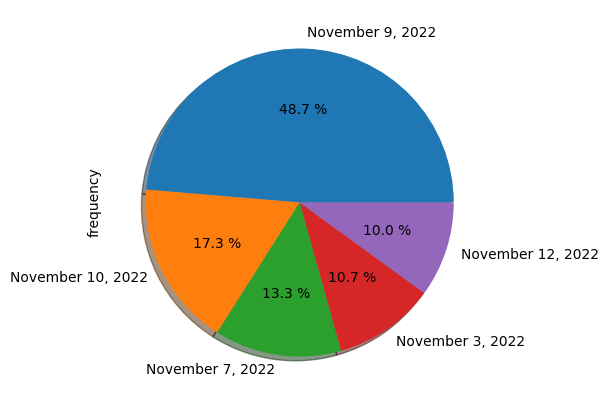

In [64]:
table2 = freq_tbl(dataFinal['_title'])
Filtro = table2[table2['frequency']>10]
Filtro_setter = Filtro.set_index("_title")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.2 _updated_by

Text(0, 0.5, 'Frecuencia')

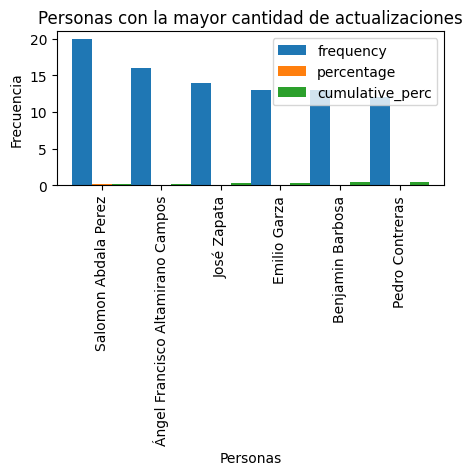

In [65]:
table1 = freq_tbl(dataFinal['_updated_by'])
Filtro = table1[table1['frequency']>9]
Filtro_setter = Filtro.set_index("_updated_by")
Filtro_setter
Filtro_setter.plot(kind = "bar" , width=1, figsize=(5,2))
plt.title('Personas con la mayor cantidad de actualizaciones')
plt.xlabel('Personas')
plt.ylabel('Frecuencia')

####9.3 232_type_of_store

<Axes: ylabel='frequency'>

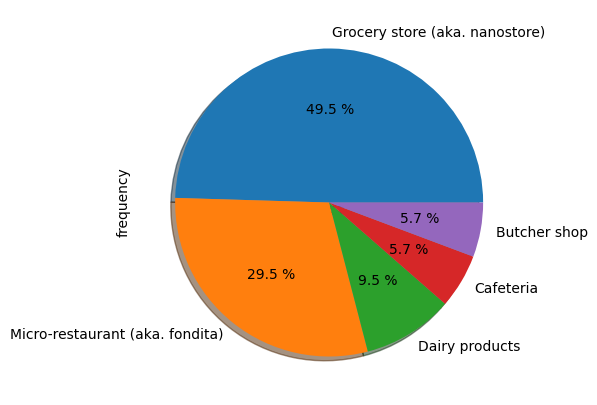

In [67]:
table3 = freq_tbl(dataFinal['232_type_of_store'])
Filtro = table3[table3['frequency']>5]
Filtro_setter = Filtro.set_index("232_type_of_store")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.4 108_does_the_micro_retailer_has_a_barred_window_

<Axes: ylabel='frequency'>

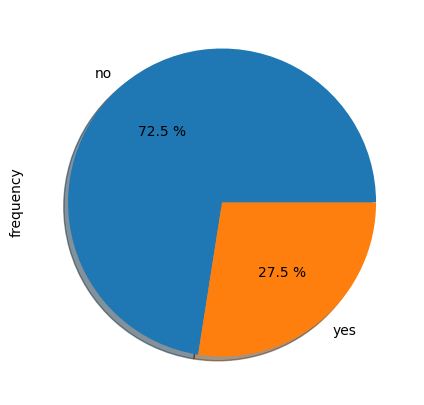

In [68]:
table4 = freq_tbl(dataFinal['108_does_the_micro_retailer_has_a_barred_window_'])
Filtro = table4[table4['frequency']>5]
Filtro_setter = Filtro.set_index("108_does_the_micro_retailer_has_a_barred_window_")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.5 99_does_the_micro_retailer_exhibits_products_outside_

<Axes: ylabel='frequency'>

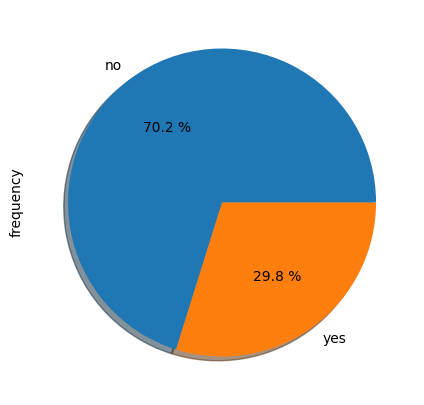

In [69]:
table5 = freq_tbl(dataFinal['99_does_the_micro_retailer_exhibits_products_outside_'])
Filtro = table5[table5['frequency']>5]
Filtro_setter = Filtro.set_index("99_does_the_micro_retailer_exhibits_products_outside_")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.6 102_does_the_micro_retailer_sells_fresh_products_

<Axes: ylabel='frequency'>

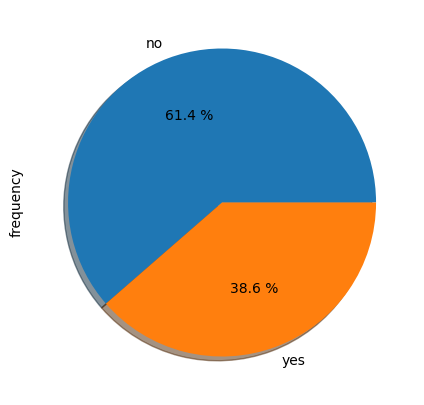

In [70]:
table6 = freq_tbl(dataFinal['102_does_the_micro_retailer_sells_fresh_products_'])
Filtro = table6[table6['frequency']>5]
Filtro_setter = Filtro.set_index("102_does_the_micro_retailer_sells_fresh_products_")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.7 97_number_of_customers_in_store

<Axes: ylabel='frequency'>

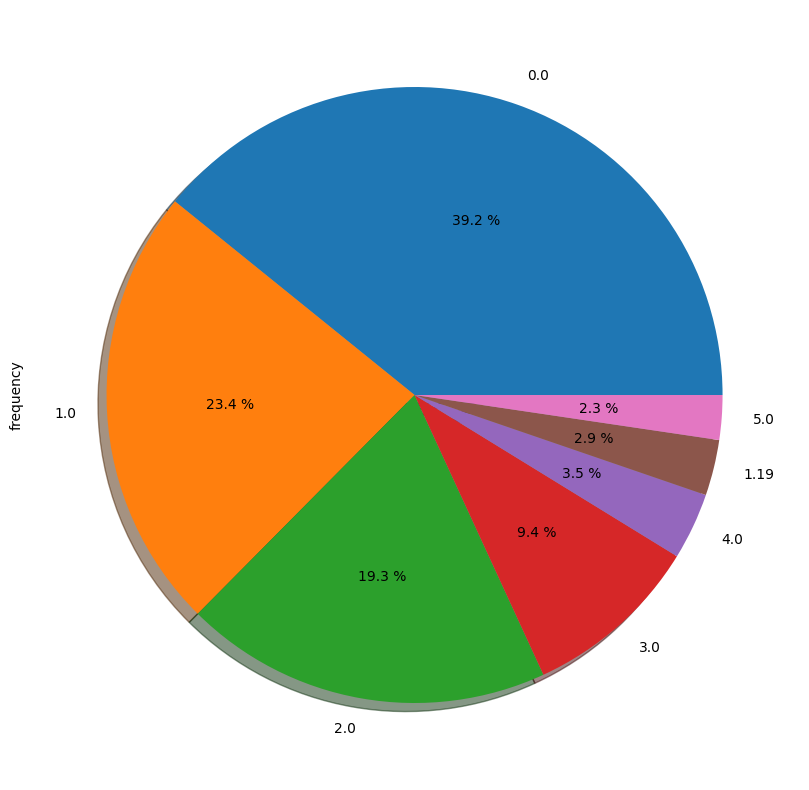

In [71]:
table7 = freq_tbl(dataFinal['97_number_of_customers_in_store'].astype("string"))
Filtro = table7[table7['frequency']>2]
Filtro_setter = Filtro.set_index("97_number_of_customers_in_store")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,10), shadow=True, autopct="%0.1f %%")

####9.8 268_number_fridges

14, 16, 21, 22, 25, 26, 31

<Axes: ylabel='frequency'>

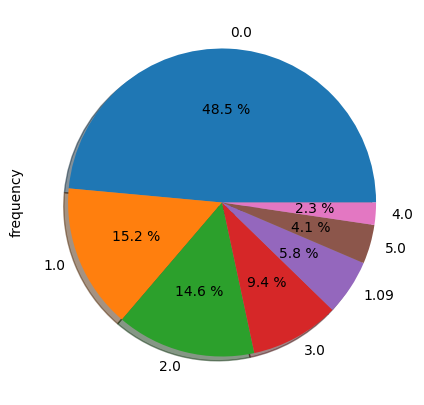

In [92]:
table8 = freq_tbl(dataFinal['268_number_fridges'].astype("string"))
Filtro = table8[table8['frequency'] > 0]
Filtro_setter = Filtro.set_index("268_number_fridges")

# Crear un gráfico de pastel directamente desde la columna 'frequency'
Filtro_setter["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")


####9.9 104_how_many_shelves_does_the_micro_retailer_have

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

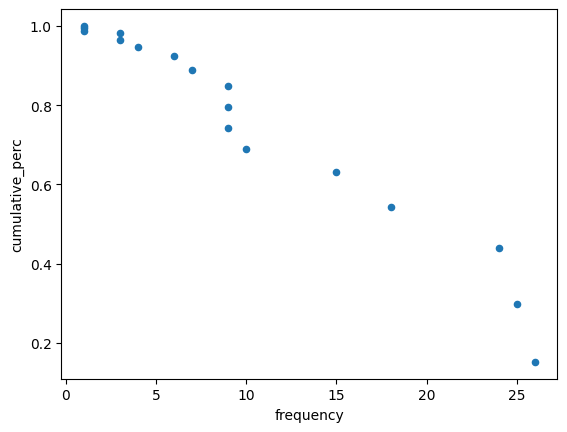

In [94]:
table9 = freq_tbl(dataFinal['104_how_many_shelves_does_the_micro_retailer_have'].astype("string"))
Filtro = table9[table9['frequency'] > 0]
Filtro_setter = Filtro.set_index("104_how_many_shelves_does_the_micro_retailer_have")

#Realizamos grafico de dispersion del datafrae filtrado
Filtro_setter.plot("frequency", "cumulative_perc", kind = "scatter")

####9.10 2_current_permanent_employees

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

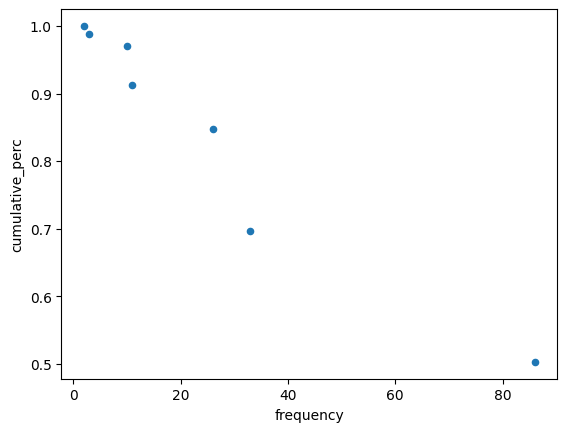

In [95]:
table10 = freq_tbl(dataFinal['2_current_permanent_employees'].astype("string"))
Filtro = table10[table10['frequency'] > 0]
Filtro_setter = Filtro.set_index("2_current_permanent_employees")

#Realizamos grafico de dispersion del datafrae filtrado
Filtro_setter.plot("frequency", "cumulative_perc", kind = "scatter")

####9.11 4_number_permanent_employees_last_year

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

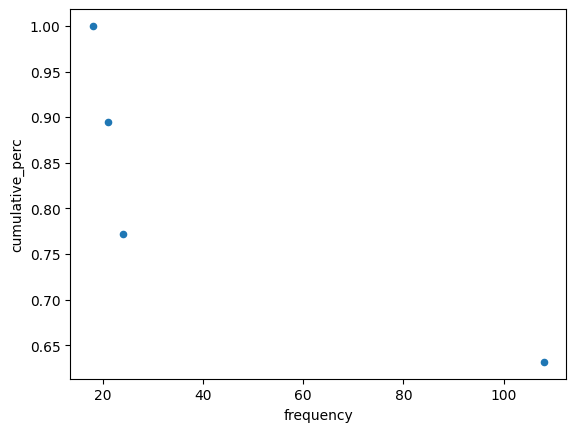

In [96]:
table11 = freq_tbl(dataFinal['4_number_permanent_employees_last_year'].astype("string"))
Filtro = table11[table11['frequency'] > 0]
Filtro_setter = Filtro.set_index("4_number_permanent_employees_last_year")

#Realizamos grafico de dispersion del datafrae filtrado
Filtro_setter.plot("frequency", "cumulative_perc", kind = "scatter")

####9.12 20_reviews_finances_monthly

<Axes: ylabel='frequency'>

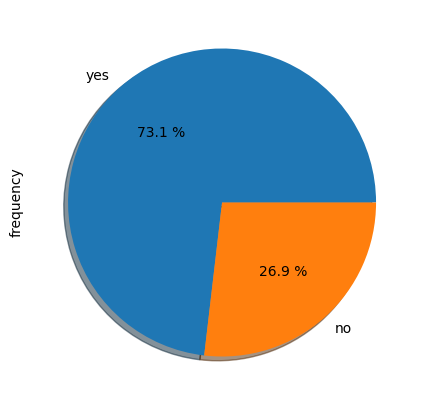

In [98]:
table12 = freq_tbl(dataFinal['20_reviews_finances_monthly'].astype("string"))
Filtro = table12[table12['frequency'] > 0]
Filtro_setter = Filtro.set_index("20_reviews_finances_monthly")

# Crear un gráfico de pastel directamente desde la columna 'frequency'
Filtro_setter["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")

####9.13 49_inventory_records

<Axes: ylabel='frequency'>

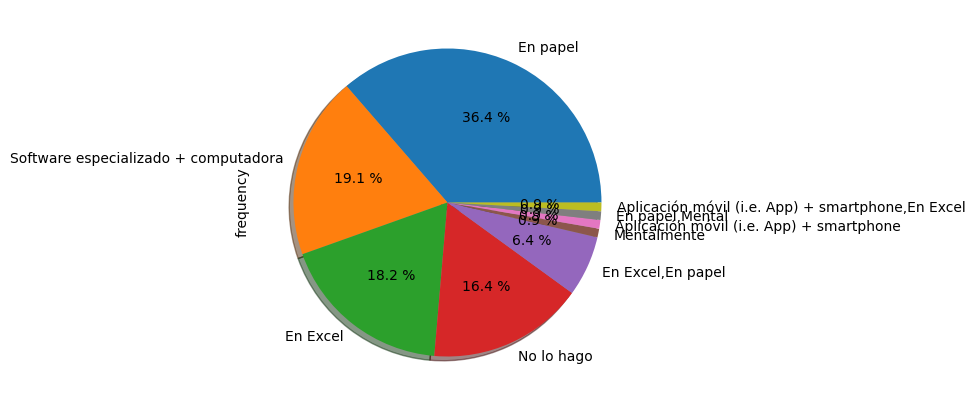

In [99]:
table13 = freq_tbl(dataFinal['49_inventory_records'].astype("string"))
Filtro = table13[table13['frequency'] > 0]
Filtro_setter = Filtro.set_index("49_inventory_records")

# Crear un gráfico de pastel directamente desde la columna 'frequency'
Filtro_setter["frequency"].plot(kind="pie", figsize=(10, 5), shadow=True, autopct="%0.1f %%")

####9.14 145_number_direct_competitors

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

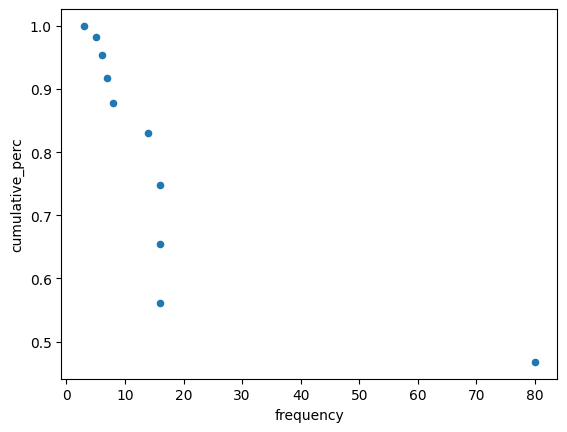

In [100]:
table14 = freq_tbl(dataFinal['145_number_direct_competitors'].astype("string"))
Filtro = table14[table14['frequency'] > 0]
Filtro_setter = Filtro.set_index("145_number_direct_competitors")

#Realizamos grafico de dispersion del datafrae filtrado
Filtro_setter.plot("frequency", "cumulative_perc", kind = "scatter")

####9.15 186_internet_connection

<Axes: ylabel='frequency'>

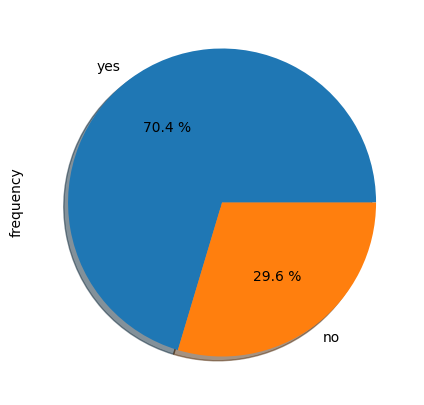

In [76]:
table15 = freq_tbl(dataFinal['186_internet_connection'])
Filtro = table15[table15['frequency']>5]
Filtro_setter = Filtro.set_index("186_internet_connection")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.16 214_customer_relationship_tools

<Axes: ylabel='frequency'>

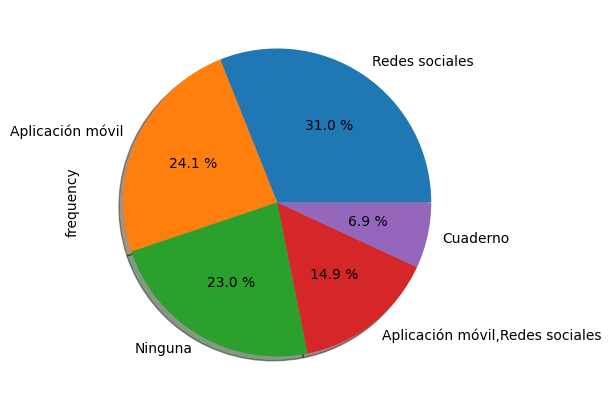

In [78]:
table16 = freq_tbl(dataFinal['214_customer_relationship_tools'])
Filtro = table16[table16['frequency']>5]
Filtro_setter = Filtro.set_index("214_customer_relationship_tools")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.17 33_credit_to_customers

<Axes: ylabel='frequency'>

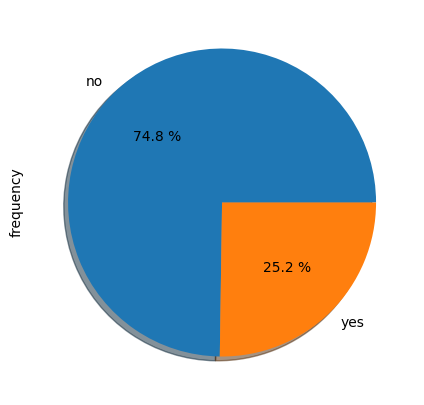

In [79]:
table17 = freq_tbl(dataFinal['33_credit_to_customers'])
Filtro = table17[table17['frequency']>5]
Filtro_setter = Filtro.set_index("33_credit_to_customers")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.18 227_agreement_ecommerce_platforms

<Axes: ylabel='frequency'>

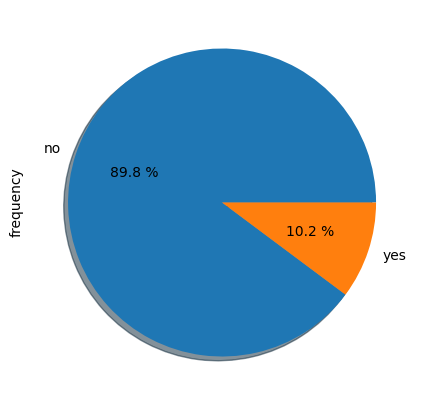

In [80]:
table18 = freq_tbl(dataFinal['227_agreement_ecommerce_platforms'])
Filtro = table18[table18['frequency']>5]
Filtro_setter = Filtro.set_index("227_agreement_ecommerce_platforms")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.19 60_services

<Axes: ylabel='frequency'>

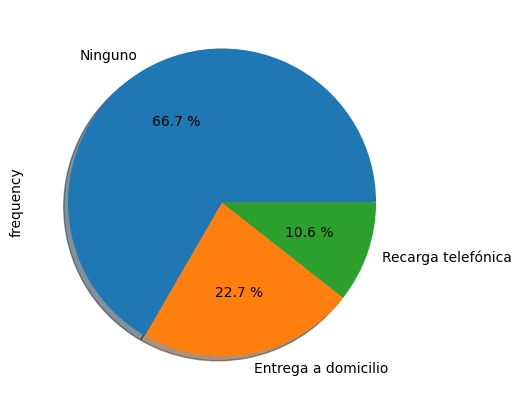

In [81]:
table19 = freq_tbl(dataFinal['60_services'])
Filtro = table19[table19['frequency']>5]
Filtro_setter = Filtro.set_index("60_services")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")

####9.20 277_payment_method_suppliers

<Axes: ylabel='frequency'>

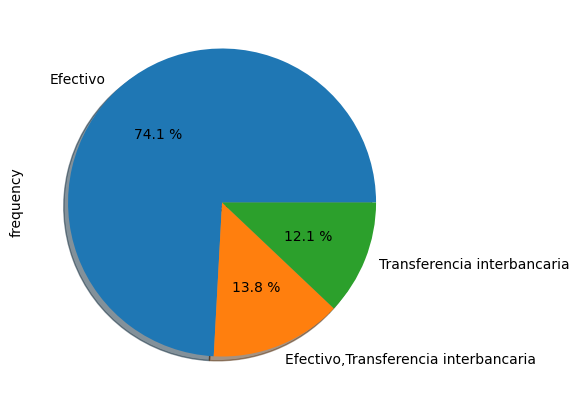

In [82]:
table20 = freq_tbl(dataFinal['277_payment_method_suppliers'])
Filtro = table20[table20['frequency']>5]
Filtro_setter = Filtro.set_index("277_payment_method_suppliers")
Filtro_setter

Filtro_setter["frequency"].plot(kind="pie", figsize=(10,5), shadow=True, autopct="%0.1f %%")